In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
std1 = pd.read_csv('Datasets/student-mat.csv', sep=';', header=0)
std2 = pd.read_csv('Datasets/student-por.csv', sep=';', header=0)

In [3]:
std1.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [4]:
std2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
students = pd.concat([std1, std2], ignore_index=True)

students.iloc[393:398]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9
395,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
396,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
397,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [6]:
students.shape

(1044, 33)

In [7]:
# Check for missing values
students.isnull().sum().sort_values(ascending=False)

G3            0
schoolsup     0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
famsup        0
G2            0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
school        0
dtype: int64

In [8]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-nul

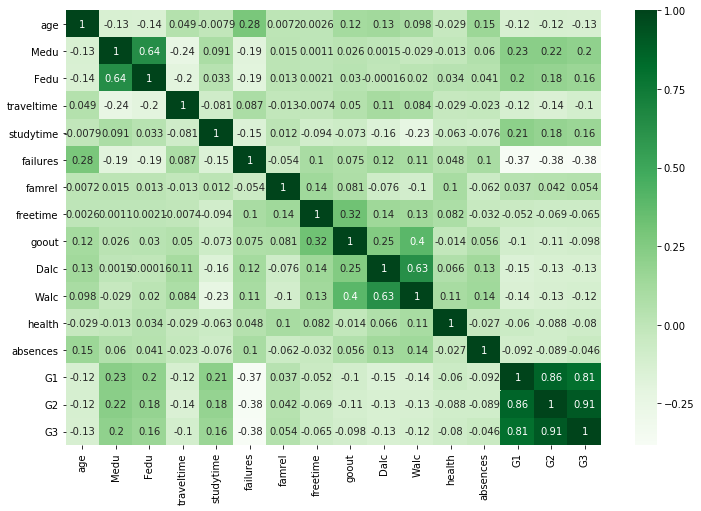

In [10]:
# Inspect feature coorelation
plt.figure(figsize=(12, 8))
sns.heatmap(students.corr(), annot=True, cmap='Greens');

In [11]:
students.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.910743
G1            0.809142
Medu          0.201472
studytime     0.161629
Fedu          0.159796
famrel        0.054461
absences     -0.045671
freetime     -0.064890
health       -0.080079
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoded_students = OneHotEncoder().fit_transform(students).toarray()

In [13]:
encoded_students

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [14]:
encoded_students.shape

(1044, 192)

In [15]:
students_df = pd.DataFrame(encoded_students)

In [16]:
students_df.head()

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
students['traveltime'].value_counts()

1    623
2    320
3     77
4     24
Name: traveltime, dtype: int64

C:\Users\Anubhav Karelia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


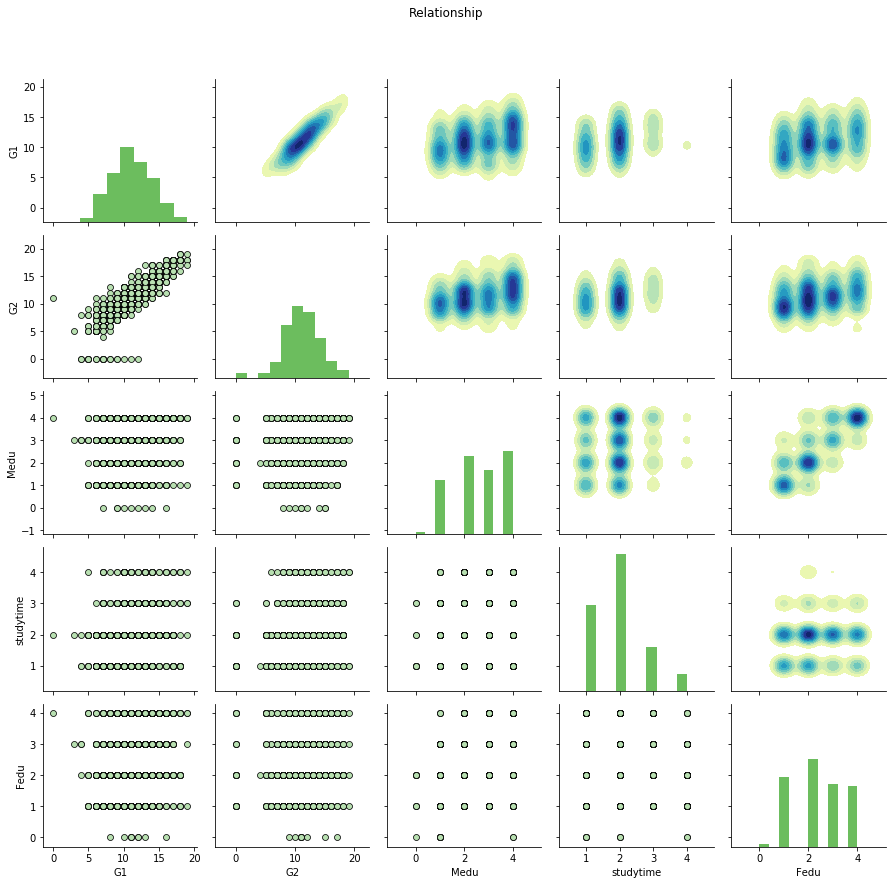

In [18]:
g = sns.PairGrid(students[['G1', 'G2', 'Medu', 'studytime', 'Fedu']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)

In [19]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
# Assumptions
# 1. Linear Relationship

# Drop Protected columns
students = students.drop(['school', 'sex', 'age', 'address'], axis=1)

In [22]:
students.head()

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GT3,A,4,4,at_home,teacher,course,mother,2,2,...,4,3,4,1,1,3,6,5,6,6
1,GT3,T,1,1,at_home,other,course,father,1,2,...,5,3,3,1,1,3,4,5,5,6
2,LE3,T,1,1,at_home,other,other,mother,1,2,...,4,3,2,2,3,3,10,7,8,10
3,GT3,T,4,2,health,services,home,mother,1,3,...,3,2,2,1,1,5,2,15,14,15
4,GT3,T,3,3,other,other,home,father,1,2,...,4,3,2,1,2,5,4,6,10,10


In [25]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 29 columns):
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null int64
Dalc          1044 non-null int64
Walc          1044 non-null int64
health        1044 non-null int64
absences      1044 non-null i

In [28]:
cat_cols = students.select_dtypes(exclude='int64').columns

In [39]:
df = pd.get_dummies(students, columns=cat_cols.values)

In [40]:
df.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,4,4,2,2,0,4,3,4,1,1,...,1,0,0,1,0,1,1,0,1,0
1,1,1,1,2,0,5,3,3,1,1,...,1,0,1,0,0,1,0,1,1,0
2,1,1,1,2,3,4,3,2,2,3,...,1,0,0,1,0,1,0,1,1,0
3,4,2,1,3,0,3,2,2,1,1,...,0,1,0,1,0,1,0,1,0,1
4,3,3,1,2,0,4,3,2,1,2,...,1,0,0,1,0,1,1,0,1,0


In [42]:
df.corr()['G3'].sort_values(ascending=False)

G3                   1.000000
G2                   0.910743
G1                   0.809142
higher_yes           0.236578
Medu                 0.201472
studytime            0.161629
Fedu                 0.159796
reason_reputation    0.121303
internet_yes         0.107064
Fjob_teacher         0.101361
Mjob_health          0.101349
romantic_no          0.098363
Mjob_teacher         0.084521
schoolsup_no         0.079346
famsize_LE3          0.061209
famrel               0.054461
paid_no              0.049388
Mjob_services        0.045015
guardian_father      0.042778
Fjob_health          0.042101
nursery_yes          0.039950
activities_yes       0.033998
Pstatus_A            0.030693
famsup_yes           0.013313
guardian_mother      0.009746
reason_home          0.003895
famsup_no           -0.013313
Fjob_at_home        -0.021194
Fjob_other          -0.023825
Pstatus_T           -0.030693
activities_no       -0.033998
Fjob_services       -0.035273
nursery_no          -0.039950
reason_oth

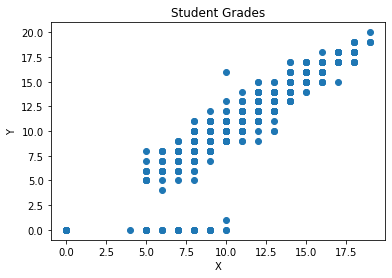

In [43]:
X1 = df['G2']
y = df['G3']

plt.scatter(X1, y)
plt.title('Student Grades')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

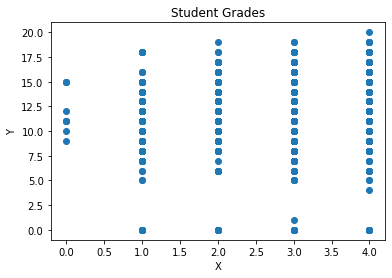

In [44]:
X1 = df['Medu']
y = df['G3']

plt.scatter(X1, y)
plt.title('Student Grades')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

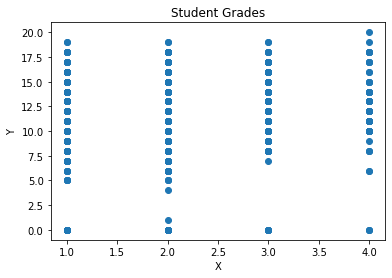

In [45]:
X1 = df['studytime']
y = df['G3']

plt.scatter(X1, y)
plt.title('Student Grades')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [47]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)

In [57]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [51]:
X = df.G2
Y = df.G3
X = sm.add_constant(X)
X.head()

C:\Users\Anubhav Karelia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,G2
0,1.0,6
1,1.0,5
2,1.0,8
3,1.0,14
4,1.0,10


In [52]:
est = sm.OLS(Y, X)

In [53]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     5068.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:59:25   Log-Likelihood:                -1969.0
No. Observations:                1044   AIC:                             3942.
Df Residuals:                    1042   BIC:                             3952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7079      0.176     -4.015      0.000      -1.054      -0.362
G2             1.0715      0.015     71.188      0.000       1.042       1.101
==============================================================================
Omnibus:                      714.254   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10032.938
Skew:                          -3.010   Prob(JB):                         0.00
Kurtosis:                      16.943   Cond. No.                         42.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
durbin_watson(est.resid)

1.817702260194444

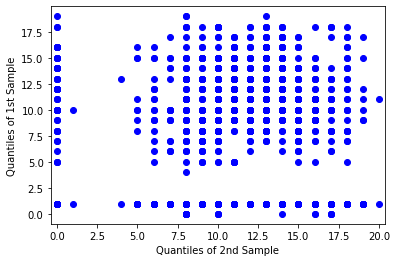

In [60]:
# Create QQ Plot to find out normality
from statsmodels.graphics.gofplots import qqplot_2samples
pp_x = sm.ProbPlot(X)
pp_y = sm.ProbPlot(Y)
qqplot_2samples(pp_x, pp_y)
plt.show()